# Paper Run Regression

In [1]:
%pylab inline
pylab.style.use('ggplot')
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [13]:
import requests
URL = 'http://people.sc.fsu.edu/~jburkardt/datasets/regression/x04.txt'
response = requests.get(URL)
text = response.text

In [32]:
columns = ['Index', 'Print Runs', 'Page Numbers', 'Orders']

In [40]:
lines = [line.strip() for line in text.split('\n') if not line.strip().startswith('#')]
data = lines[6:-2]
data = np.array([row.split() for row in data], dtype=np.float)
data[:, 0] = data[:, 0].astype(np.int)
data_df = pd.DataFrame(data, columns=columns)
data_df = data_df.rename(columns={name: name.lower().replace(' ', '_') for name in data_df.keys()})
data_df = data_df.drop('index', axis=1)

In [43]:
data_df.head()

,print_runs,page_numbers,orders
0,2800.0,22.0,437.0
1,2670.0,14.0,204.0
2,2800.0,37.0,725.0
3,2784.0,15.0,279.0
4,2800.0,38.0,474.0


In [42]:
data_df.corr()

,print_runs,page_numbers,orders
print_runs,1.000000,0.403569,0.555822
page_numbers,0.403569,1.000000,0.946250
orders,0.555822,0.946250,1.000000


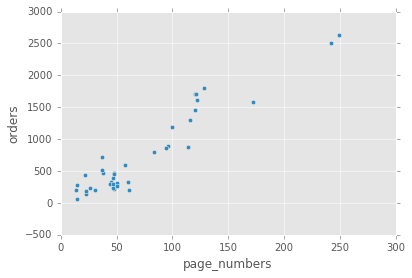

In [44]:
data_df.plot(kind='scatter', x='page_numbers', y='orders')

## Model 1: orders ~ page_numbers

In [46]:
import statsmodels.formula.api as sm
result = sm.ols(formula='orders ~ page_numbers', data=data_df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 orders   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     308.1
Date:                Thu, 30 Mar 2017   Prob (F-statistic):           3.13e-19
Time:                        22:06:42   Log-Likelihood:                -258.16
No. Observations:                  38   AIC:                             520.3
Df Residuals:                      36   BIC:                             523.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -76.0962     59.571     -1.277      0.210    -196.912      44.719
page_numbers    11.2620      0.642     17.554      0.000       9.961      12.563
==============================================================================
Omnibus:                        1.714   Durbin-Watson:                   1.196
Prob(Omnibus):                  0.424   Jarque-Bera (JB):                1.630
Skew:                           0.450   Prob(JB):                        0.443
Kurtosis:                       2.529   Cond. No.                         154.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 2: orders ~ page_numbers + print_runs

In [47]:
import statsmodels.formula.api as sm
result = sm.ols(formula='orders ~ page_numbers + print_runs', data=data_df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 orders   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     238.1
Date:                Thu, 30 Mar 2017   Prob (F-statistic):           4.18e-21
Time:                        22:07:41   Log-Likelihood:                -250.11
No. Observations:                  38   AIC:                             506.2
Df Residuals:                      35   BIC:                             511.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -364.8455     83.076     -4.392      0.000    -533.499    -196.192
page_numbers    10.2639      0.575     17.840      0.000       9.096      11.432
print_runs       0.1833      0.043      4.298      0.000       0.097       0.270
==============================================================================
Omnibus:                        1.161   Durbin-Watson:                   1.514
Prob(Omnibus):                  0.560   Jarque-Bera (JB):                0.547
Skew:                           0.279   Prob(JB):                        0.761
Kurtosis:                       3.188   Cond. No.                     5.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""